In [29]:
!ls ../data

File_1_TaoDing_microbiome.biom
File_2_TaoDing_Microbiome_taxonomy.tsv
File_3_FerretMicrobiomeMetadata.xlxs.xlsx


In [51]:
import pandas as pd
beta_means = pd.read_csv('../results/estimates/beta_means.csv', index_col=0)
beta_stds = pd.read_csv('../results/estimates/beta_stds.csv', index_col=0)
taxonomy = pd.read_table('../data/File_2_TaoDing_Microbiome_taxonomy.tsv', index_col=0)

In [52]:
taxadf = pd.DataFrame(taxonomy.Taxon.apply(lambda x: x.split('; ')).values.tolist(),
             columns=['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'],
             index=taxonomy.index
            )
taxadf = taxadf.fillna(' ')

In [53]:
beta_means = beta_means.rename(columns={"Intercept": 'MeanIntercept', 'Days': 'MeanDays'})
beta_stds = beta_stds.rename(columns={"Intercept": 'StdIntercept', 'Days': 'StdDays'})

In [54]:
data = pd.concat((beta_means, beta_stds, taxadf), axis=1)
data = data.loc[beta_means.index]

/Users/jmorton/miniconda3/envs/qiime2-2020.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [88]:
data = data.sort_values('MeanDays')

In [89]:
data

,MeanIntercept,MeanDays,StdIntercept,StdDays,Kingdom,Phylum,Class,Order,Family,Genus,Species
8630154f745ba598cdab0bbc4abb4e54,-0.781197,-3.408856,3.341126,1.534966,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Planococcaceae,g__Chryseomicrobium,s__imtechense
a190c299e9757abba3f1f305f00380ec,-0.689414,-3.071658,2.929076,0.676403,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptostreptococcaceae,g__,s__
f37fc1dccfeba0004cbeb4f1ad6083c6,-4.045718,-2.822834,4.482455,0.877858,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Oxalobacteraceae,g__Janthinobacterium,s__
33295f1846cff2bf9c88e15798fbc91d,10.150748,-2.806904,1.334147,0.276954,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Anoxybacillus,
f43836fb3dbc1fe9a3f95af640d01a85,-3.555254,-2.697879,3.656785,0.672368,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Actinomycetaceae,g__N09,s__
...,...,...,...,...,...,...,...,...,...,...,...
1368aca6d12ec4a9bbf16a2ff67104e1,1.423934,3.133315,4.990959,1.047456,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Micrococcaceae,g__Microbispora,s__rosea
6096ab7a207694486408f668a1344cd5,-0.438347,3.285601,3.155303,0.904143,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,
1214531d2f7d3a766904675cda3524e1,0.925415,4.021893,6.521729,0.655688,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__,s__
7950b986622a877a28770aef4b4c4dd2,2.300629,4.025152,4.542247,1.204827,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__


Text(0, 0.5, 'Log fold change over Days')

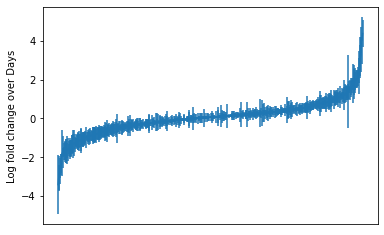

In [67]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

    
x = np.arange(len(data.MeanDays.values))
y = data.MeanDays.values
yerr = data.StdDays.values
plt.errorbar(x, y, yerr=yerr)
plt.xticks([])
plt.ylabel('Log fold change over Days')

In [78]:
data.Phylum.value_counts()

p__Firmicutes        226
p__Proteobacteria    180
p__Actinobacteria     64
p__Bacteroidetes      52
p__Fusobacteria       16
p__Cyanobacteria       9
p__Tenericutes         6
p__[Thermi]            4
p__Fibrobacteres       1
Name: Phylum, dtype: int64

In [85]:
x[phylum == data.Phylum].shape, y.shape

((226,), (226,))

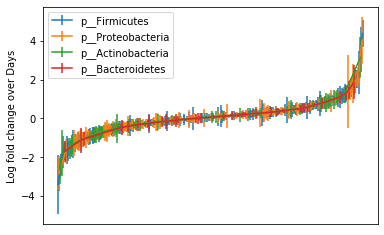

In [90]:
x = np.arange(len(data.MeanDays.values))
for phylum in data.Phylum.value_counts().index[:4]:
    idx = phylum == data.Phylum
    y = data.loc[idx, 'MeanDays'].values
    yerr = data.StdDays.values[idx]    
    plt.errorbar(x[idx], y, yerr=yerr, label=phylum)
    
plt.xticks([])
plt.ylabel('Log fold change over Days')
plt.legend()
plt.savefig('../figures/day_fold_change.png')

In [ ]:
data.to_csv('../results/day_fold_change.csv')